#### 단축키

- 마크다운~함수 전환
    - m : 마크다운
    - y : 코드
- 실행하고 셀추가
    - alt + enter : 추가하고 다음셀로 가기
    - ctrl + enter : 추가하고 현재셀에 있기
- 잘라내고 붙여넣기
    - x : cut
    - v : paste below cell
    - shift+v : paste above
- 삭제
    - d,d : delete cell
    - z : undo delete cell
- 셀 추가하기
    - a add cell above
    - b add cell below
- 리스팅
    - l listing

In [2]:
from pandas import Series, DataFrame
import pandas as pd

In [3]:
example_obj = Series()

- 괄호안에 커서 두고 Shift enter 하면 설명 팝업


```sql
vscode@441e368db4cd:/$ cd home/vscode/notebooks
vscode@441e368db4cd:~/notebooks$ ls
a.py  data.zip  test.ipynb
vscode@441e368db4cd:~/notebooks$ mkdir data
vscode@441e368db4cd:~/notebooks$ ls
a.py  data  data.zip  test.ipynb
vscode@441e368db4cd:~/notebooks$ mv data.zip ./data
vscode@441e368db4cd:~/notebooks$ cd data
vscode@441e368db4cd:~/notebooks/data$ ls
data.zip
vscode@441e368db4cd:~/notebooks/data$ unzip data.zip
Archive:  data.zip
  inflating: banklist.csv            
  inflating: billboard.csv           
  inflating: concat_1.csv            
  inflating: concat_2.csv            
  inflating: concat_3.csv            
  inflating: country_timeseries.csv  
  inflating: gapminder.tsv           
  inflating: pew.csv                 
  inflating: raw_data_urls.txt       
  inflating: scientists.csv          
  inflating: survey_person.csv       
  inflating: survey_site.csv         
  inflating: survey_survey.csv       
  inflating: survey_visited.csv      
  inflating: tesla_stock_quandl.csv  
  inflating: weather.csv             
vscode@441e368db4cd:~/notebooks/data$ 
```


In [4]:
import pandas as pd

In [5]:
df = pd.read_csv('./data/gapminder.tsv', sep='\t')
## seperate tab

In [6]:
print(df.head())

       country continent  year  lifeExp       pop   gdpPercap
0  Afghanistan      Asia  1952   28.801   8425333  779.445314
1  Afghanistan      Asia  1957   30.332   9240934  820.853030
2  Afghanistan      Asia  1962   31.997  10267083  853.100710
3  Afghanistan      Asia  1967   34.020  11537966  836.197138
4  Afghanistan      Asia  1972   36.088  13079460  739.981106


In [7]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [8]:
print(df.shape)

(1704, 6)


In [9]:
print(df.shape[0])

1704


In [10]:
print(df.columns)

Index(['country', 'continent', 'year', 'lifeExp', 'pop', 'gdpPercap'], dtype='object')


In [11]:
print(df.dtypes)
# 년도는 덧셈이 없을경우 만 필요
# int8 로 해도 충분 (1byte = 8bit)

country       object
continent     object
year           int64
lifeExp      float64
pop            int64
gdpPercap    float64
dtype: object


In [12]:
print(df.info()) # 보다시피 1704개씩 각 컬럼 동일. 빈 데이터 있는지 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
country      1704 non-null object
continent    1704 non-null object
year         1704 non-null int64
lifeExp      1704 non-null float64
pop          1704 non-null int64
gdpPercap    1704 non-null float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB
None


In [13]:
country_df = df['country']

print(type(country_df))
# series로 바뀐것 확인 가능. 
# 컬럼이 Series, 표가 DataFrame
# DataFrame에 관한 명령어 입력시 실행 안됨 유의

<class 'pandas.core.series.Series'>


In [14]:
# 컬럼이름이 여러개일경우
subset = df[['country', 'continent', 'year']]
print(type(subset))


<class 'pandas.core.frame.DataFrame'>


In [15]:
print(country_df.tail()) # ()안에서 shift tab 하면 설명 툴팁 출력

1699    Zimbabwe
1700    Zimbabwe
1701    Zimbabwe
1702    Zimbabwe
1703    Zimbabwe
Name: country, dtype: object


In [16]:
print(country_df.head(6))

0    Afghanistan
1    Afghanistan
2    Afghanistan
3    Afghanistan
4    Afghanistan
5    Afghanistan
Name: country, dtype: object


## loc 속성으로 행 단위 데이터 추출하기(35쪽)

In [17]:
print(df.loc[0])

country      Afghanistan
continent           Asia
year                1952
lifeExp           28.801
pop              8425333
gdpPercap        779.445
Name: 0, dtype: object


In [23]:
number_of_rows = df.shape[0] #행 개수 가져오는 방법:1704
last_row_index = number_of_rows -1

print(df.loc[last_row_index])

country      Zimbabwe
continent      Africa
year             2007
lifeExp        43.487
pop          12311143
gdpPercap     469.709
Name: 1703, dtype: object


In [61]:
print(df.tail(n=1))

       country continent  year  lifeExp       pop   gdpPercap
1703  Zimbabwe    Africa  2007   43.487  12311143  469.709298


In [28]:
print(df.loc[[0,99,999]]) # [[0,1,2,..]] 유의

         country continent  year  lifeExp       pop    gdpPercap
0    Afghanistan      Asia  1952   28.801   8425333   779.445314
99    Bangladesh      Asia  1967   43.453  62821884   721.186086
999     Mongolia      Asia  1967   51.253   1149500  1226.041130


In [30]:
print(type(df.loc[[0,99,999]]))

<class 'pandas.core.frame.DataFrame'>


## tail메서드와 loc속성이 반환하는 자료형은 

In [29]:
subset_loc  = df.loc[0]
subset_tail = df.tail(n=1)

print(type(subset_loc))
print(type(subset_tail))

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


In [31]:
print(subset_tail)

       country continent  year  lifeExp       pop   gdpPercap
1703  Zimbabwe    Africa  2007   43.487  12311143  469.709298


In [72]:
columns1 = df.columns
columns_nums = dict()
# for key in columns1:columns_nums[key] = columns1.index(key)+1 
k = 1
for key in columns1:
    columns_nums[key] = k
    k += 1
print(columns_nums)
## 아래와 같이 하나씩 넣을 수느 없다. 
# for i in columns_nums:
#     df.columns = columns_nums[i]


{'country': 1, 'continent': 2, 'year': 3, 'lifeExp': 4, 'pop': 5, 'gdpPercap': 6}


## iloc 속성으로 행 데이터 추출하기 37쪽
- 인덱스가 아니라 행번호로 가져오기
- 장단점:
    - [-1] 가능 (인덱스 변하는 데이터에서 매번 뒤 10개 가져와야할때 용이)

In [32]:
print(df.iloc[1])

country      Afghanistan
continent           Asia
year                1957
lifeExp           30.332
pop              9240934
gdpPercap        820.853
Name: 1, dtype: object


In [33]:
print(df.iloc[-1])

country      Zimbabwe
continent      Africa
year             2007
lifeExp        43.487
pop          12311143
gdpPercap     469.709
Name: 1703, dtype: object


## 데이터 추출하기 - 슬라이싱, range 39쪽

1. 슬라이싱 구문으로 데이터 추출하기

In [42]:
subset = df.loc[:3, ['year','pop']]
print(subset.head())

   year       pop
0  1952   8425333
1  1957   9240934
2  1962  10267083
3  1967  11537966


In [53]:
subset = df.iloc[:, [0, 1, -1]] # 컬럼명이 누락된 경우 용이
print(subset.head())

       country continent   gdpPercap
0  Afghanistan      Asia  779.445314
1  Afghanistan      Asia  820.853030
2  Afghanistan      Asia  853.100710
3  Afghanistan      Asia  836.197138
4  Afghanistan      Asia  739.981106


In [59]:
print(df.loc)

2. range 매서드로 원하는 데이터 추출하기

In [50]:
small_range = list(range(1,4))
print(small_range)

[1, 2, 3]


In [51]:
subset = df.iloc[:, small_range]
print(subset)

     continent  year  lifeExp
0         Asia  1952   28.801
1         Asia  1957   30.332
2         Asia  1962   31.997
3         Asia  1967   34.020
4         Asia  1972   36.088
...        ...   ...      ...
1699    Africa  1987   62.351
1700    Africa  1992   60.377
1701    Africa  1997   46.809
1702    Africa  2002   39.989
1703    Africa  2007   43.487

[1704 rows x 3 columns]


In [74]:
subset = df.iloc[:, 0:6:2]
print(subset.head())

       country  year       pop
0  Afghanistan  1952   8425333
1  Afghanistan  1957   9240934
2  Afghanistan  1962  10267083
3  Afghanistan  1967  11537966
4  Afghanistan  1972  13079460


## loc, iloc 속성 자유 자재로 사용하기 (sql SELECT)

In [75]:
print(type(df.loc[[0,99,999]]))

<class 'pandas.core.frame.DataFrame'>


In [77]:
print(df.iloc[[0,99,999], [0,3,5]])

         country  lifeExp    gdpPercap
0    Afghanistan   28.801   779.445314
99    Bangladesh   43.453   721.186086
999     Mongolia   51.253  1226.041130


In [81]:
print(df.loc[[0,99,999], ['country', 'lifeexp', 'gdpPercap']]) #lifeExp 대소문자 유의

         country  lifeexp    gdpPercap
0    Afghanistan      NaN   779.445314
99    Bangladesh      NaN   721.186086
999     Mongolia      NaN  1226.041130


/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


## 그룹화한 데이터의 평균 구하기 44쪽 (GROUP BY)
1. 중복되는 년도별로 lifeExp 열을 그룹화 하여 평균값

In [82]:
print(df.groupby('year')['lifeExp'].mean())

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64


In [84]:
grouped_year_df = df.groupby('year')
print(type(grouped_year_df))

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


In [85]:
print(grouped_year_df
    )

In [90]:
grouped_year_df_lifeExp = grouped_year_df['lifeExp']
print(type(grouped_year_df_lifeExp)) # 하나의 컬럼은 씨리즈이지만 그룹화된것 차이확인

<class 'pandas.core.groupby.generic.SeriesGroupBy'>


In [91]:
print(grouped_year_df_lifeExp) # 그룹화된 데이터 자체는 단독출력 불가

In [89]:
mean_lifeExp_by_year = grouped_year_df_lifeExp.mean()
print(mean_lifeExp_by_year) # 다음과 같이 평균 등을 해서 출력 가능

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64


## 6. lifeExp, gdpPercap열의 평균값을 연도, 지역별로 그룹화하여 한번에 계산

In [95]:
multi_group_var = df.groupby(['year', 'continent'])[['lifeExp', 'gdpPercap']].mean()
print(multi_group_var.head(10))

                  lifeExp     gdpPercap
year continent                         
1952 Africa     39.135500   1252.572466
     Americas   53.279840   4079.062552
     Asia       46.314394   5195.484004
     Europe     64.408500   5661.057435
     Oceania    69.255000  10298.085650
1957 Africa     41.266346   1385.236062
     Americas   55.960280   4616.043733
     Asia       49.318544   5787.732940
     Europe     66.703067   6963.012816
     Oceania    70.295000  11598.522455


## 7. 개수 COUNT

In [105]:
print(df.groupby('continent')['country'].nunique()) # 정수타입아니므로 mean은 안먹힘

continent
Africa      52
Americas    25
Asia        33
Europe      30
Oceania      2
Name: country, dtype: int64


In [109]:
print(df.groupby('year').nunique()) # 정수형컬럼을 그룹화 하는법

      country  continent  year  lifeExp  pop  gdpPercap
year                                                   
1952      142          5     1      142  142        142
1957      142          5     1      142  142        142
1962      142          5     1      141  142        142
1967      142          5     1      141  142        142
1972      142          5     1      142  142        142
1977      142          5     1      142  142        142
1982      142          5     1      142  142        142
1987      142          5     1      141  142        142
1992      142          5     1      141  142        142
1997      142          5     1      142  142        142
2002      142          5     1      142  142        142
2007      142          5     1      142  142        142


## 그래프
- 쥬피터에서 %matplotlib inline 추가하기

In [101]:
%matplotlib inline
import matplotlib.pyplot as plt

In [103]:
global_yearly_life_expectancy = df.groupby('year')['lifeExp'].mean()
print(global_yearly_life_expectancy)

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64


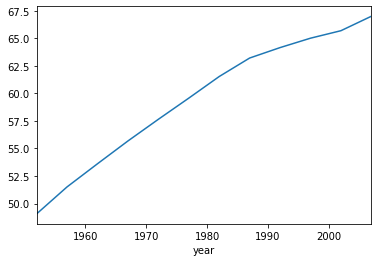

In [104]:
global_yearly_life_expectancy.plot()

# 시리즈와 데이터 프레임 직접 만들기 

## 1. 시리즈 만들기 51쪽

In [116]:
import pandas as pd
s= pd.Series(['banana', 42])
print(s)

0    banana
1        42
dtype: object


In [117]:
s = pd.Series(['Wes McKinney', 'Creator of Pandas'])
print(s)

0         Wes McKinney
1    Creator of Pandas
dtype: object


In [118]:
s = pd.Series(['Wes McKinney', 'Creator of Pandas'], index=['Person', 'Who'])
print(s)

Person         Wes McKinney
Who       Creator of Pandas
dtype: object


In [119]:
s = pd.Series(df.columns)
print(s)

0      country
1    continent
2         year
3      lifeExp
4          pop
5    gdpPercap
dtype: object


## 3. 데이터 프레임 만들기

In [122]:
scientists = pd.DataFrame({
            'Name'       : ['Rosalie Franklin', 'William Gosset'],
            'Occupation' : ['Chemist', 'Statistician'],
            'Born'       : ['1920-07-25', '1885-21-32'],
            'Age'        : [45, 66]}
)
print(scientists)

               Name    Occupation        Born  Age
0  Rosalie Franklin       Chemist  1920-07-25   45
1    William Gosset  Statistician  1885-21-32   66


In [124]:
scientists = pd.DataFrame(
     data ={
            'Occupation' : ['Chemist', 'Statistician'],
            'Born'       : ['1920-07-25', '1885-21-32'],
            'Age'        : [45, 66]
     },
    index = ['Rosalie Franklin', 'William Gosset'],
    columns = ['Occupation', 'Born', 'Age']
    
)
print(scientists)

                    Occupation        Born  Age
Rosalie Franklin       Chemist  1920-07-25   45
William Gosset    Statistician  1885-21-32   66


In [153]:
from collections import OrderedDict

scientists = pd.DataFrame(OrderedDict([ 
    ('Name', ['Rosaline Franklin', 'William Gosset']),
    ('Occupation', ['Chemist', 'Statistician']), 
    ('Born', ['1920-07-25', '1876-06-13']), 
    ('Died', ['1958-04-16', '1937-10-16']), 
    ('Age', [37, 61])
])
) 
print(scientists)

                Name    Occupation        Born        Died  Age
0  Rosaline Franklin       Chemist  1920-07-25  1958-04-16   37
1     William Gosset  Statistician  1876-06-13  1937-10-16   61


In [125]:
first_row = scientists.loc['William Gosset']
print(type(first_row))

<class 'pandas.core.series.Series'>


In [126]:
print(first_row)

Occupation    Statistician
Born            1885-21-32
Age                     66
Name: William Gosset, dtype: object


# index, values 속성과 keys 메서드 사용하기

## 1. index 속성 사용하기 55쪽


In [128]:
print(first_row.index)

Index(['Occupation', 'Born', 'Age'], dtype='object')


## 2. values 메서드 사용

In [129]:
print(first_row.values)

['Statistician' '1885-21-32' 66]


## 3. keys

In [130]:
print(first_row.keys())

Index(['Occupation', 'Born', 'Age'], dtype='object')


## 4. index속성 


In [131]:
print(first_row.index[0])


Occupation


# 시리즈의 mean, min, max, std 메서드 사용

In [135]:
ages = scientists['Age'] 
print(ages)
print(ages.mean())
print(ages.min())
print(ages.max())
print(ages.std())

Rosalie Franklin    45
William Gosset      66
Name: Age, dtype: int64
55.5
45
66
14.849242404917497


# 시리즈와 불린 추출 사용하기

In [143]:
scientists = pd.read_csv('./data/scientists.csv')

In [144]:
ages = scientists['Age'] 
print(ages)

print(ages.mean())
print(ages.min())
print(ages.max())
print(ages.std())

0    37
1    61
2    90
3    66
4    56
5    45
6    41
7    77
Name: Age, dtype: int64
59.125
37
90
18.325918413937288


In [149]:
print(ages > ages.mean())
print(ages[ages > ages.mean()]) # 참값인 1,2,3,7의 인덱스 해당값만 출력
print(type(ages > ages.mean())) # True, False 값들의 series

0    False
1     True
2     True
3     True
4    False
5    False
6    False
7     True
Name: Age, dtype: bool
1    61
2    90
3    66
7    77
Name: Age, dtype: int64
<class 'pandas.core.series.Series'>


In [152]:
# manual_bool_values 하든, ages > ages.mean() 하든 동일 결과
a = [    False,     True,     True,     True,    False,    False,    False,     True]
print(ages[a])

1    61
2    90
3    66
7    77
Name: Age, dtype: int64
